### **HW1-FRA503 Machine Learning**

### **Objective Goals**

The purposes of this project are:

  1. to gain experience with data preprocessing including data observation, data cleaning, feature selection and feature extraction.
  2. to gain skills with Python coding for data analysis, model construction and result analysis.
  3. to study and analyse data correlation of the 2023 government election in Thailand 
  4. to study the government elective system in Thailand 

### **Due date**
Tuesday 31/10/2023

### **Authors**


1. Natchanon Singha        64340500017

2. Thanaphan Rueangsuk     64340500025

### **Instructions**

1. You have to work on this project with classmates (1-3 people per group).
2. You must use the Python notebook (files.ipynb) for your written report to explain the processes of building the machine learning models.
3. The report must contain the contents following “Project Assignment”.

### **Project Assignment**

**Your notebook must contain the following contents:**

**1. Data Exploration**
- How many attributes in the dataset
- Observations of good and bad things about the dataset 
- List of all attributes that you would keep or remove from the dataset and why 

**2. Data Preprocessing**
- Missing Values 
- Feature Selection 
- Feature extraction

**3. Model Construction (Linear and Logistic regression model)**
- Code (Python) description
- Experimentation with different preprocessing
- Experimentation with different testing modes
- Presentation of resulting model and evaluation
- Observations and analysis of results

## **1. Data Exploration**

The dataset that will be used for analysis and modeling machine learning is taken from https://drive.google.com/drive/folders/1ZiGHe1q6rD-4qi0rhJBOJXvfck-0UE_P.


**You can elaborate more on your dataset such as the number and the meaning of attributes or problems arising in the dataset before using in the modeling.**

Import libary(s) and Access to the Dataset
- Import Pandas and Numpy to process the dataset.
- Using read_excel() to read the excel file(s).

**Exporting all of Schema from the dataset**

From the ECT dataset, there  9 sub-sheats, 48 features which shown below. 

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
import itertools
#Decision Trees
from sklearn import tree

In [2]:
df_rcp = pd.read_excel('ML Dataset - ECT report 66.xlsx', sheet_name='result_constituencies_PartyList') 
df_inpro =  pd.read_excel('ML Dataset - ECT report 66.xlsx', sheet_name='info_province') 
df_prov =   pd.read_excel('ML Dataset - ECT report 66.xlsx', sheet_name='info_party_overview') 
df_rcs = pd.read_excel('ML Dataset - ECT report 66.xlsx', sheet_name='result_constituencies_status') 
df_rcc = pd.read_excel('ML Dataset - ECT report 66.xlsx', sheet_name='result_constituencies_Candidate') 
schema = pd.read_excel('ML Dataset - ECT report 66.xlsx', sheet_name='Schema')
selected_col = ['Sheet', 'Column', 'Description','Data Type_!']
schema = schema[selected_col]
print('All of instance in dataset',schema.shape)
schema

All of instance in dataset (48, 4)


,Sheet,Column,Description,Data Type_!
0,Candidate_Constituency,mp_app_id,Candidate ID,Categorical (Norminal)
1,Candidate_Constituency,mp_app_no,Candidate Name,Categorical (Norminal)
2,Candidate_Constituency,mp_app_party_id,Party code,Categorical (Norminal)
3,Candidate_Constituency,mp_app_name,Candidate Name,String
4,Candidate_Constituency,image_url,The URL of Candidate img,String
5,Candidate_PartyList,party_no,Party No,String
6,Candidate_PartyList,list_no,Candidate List,Categorical (Norminal)
7,Candidate_PartyList,name,Candidate Name,String
8,Candidate_PartyList,image_url,The URL of Candidate img,String
9,Candidate_PM,party_no,Party No,Categorical (Norminal)


#**2. Defining the problem statement**

**The goal** 

  1. to gain experience with data preprocessing including data observation, data cleaning, feature selection and feature extraction.
  2. to gain skills with Python coding for data analysis, model construction and result analysis.
  3. to study and analyse data correlation of the 2023 government election in Thailand 
  4. to study the government elective system in Thailand 

**The assumption**

 Pheu Thai Party (พรรคเพื่อไทย) is the most popular party in the Northeastern part (Isan) of Thailand.

- **Target Variable:** mp_app_rank
- **Predictors:** mp_app_vote, cons_id, mp_app_id, party_id.

  * mp_app_rank = 1 means the that party_id will win in that consituency.
  * mp_app_rank = other numbers means the party_id will not win in that consituency.

- **Samples:**  The voter who is going to do an elective in the Northeastern part (Isan) of Thailand.

**Determining the type of Machine Learning**

Based on the problem statement you can understand that we need to create a Classifier Decision Tree model and K-Nearest Neighbors model.

**However, from the experimental assumption which focus on constituencies candidate election. Therefore, we need to focus on sheet_name='result_constituencies_Candidate' from the .excel file.**

In [3]:
print('Shape before deleting duplicate values:', df_rcc.shape)
# Removing duplicate rows if any
df_rcc = df_rcc.drop_duplicates()
print('Shape After deleting duplicate values:', df_rcc.shape)
# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
df_rcc.head(10)

Shape before deleting duplicate values: (4781, 6)
Shape After deleting duplicate values: (4781, 6)


,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
0,ACR_1,ACR_1_1,9,459,0.43477,706
1,ACR_1,ACR_1_10,1,38275,36.25419,709
2,ACR_1,ACR_1_11,13,126,0.11935,712
3,ACR_1,ACR_1_12,12,127,0.12029,742
4,ACR_1,ACR_1_13,11,212,0.20081,761
5,ACR_1,ACR_1_2,10,234,0.22165,769
6,ACR_1,ACR_1_3,6,2701,2.55840,763
7,ACR_1,ACR_1_4,8,668,0.63273,719
8,ACR_1,ACR_1_5,4,15926,15.08515,701
9,ACR_1,ACR_1_6,3,16724,15.84102,726


#**3. Looking at the distribution of Target**



count    4781.000000
mean        6.711985
std         3.845837
min         1.000000
25%         3.000000
50%         6.000000
75%        10.000000
max        20.000000
Name: mp_app_rank, dtype: float64

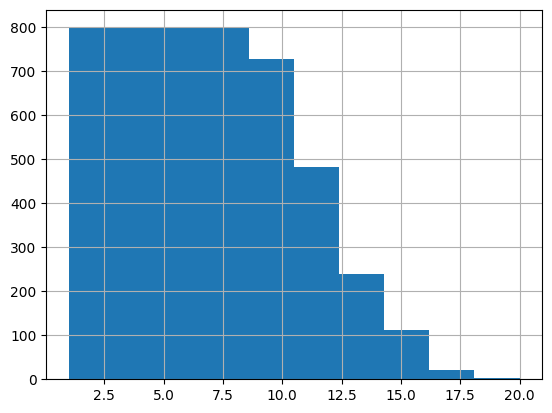

In [4]:
df_rcc['mp_app_rank'].hist()
df_rcc['mp_app_rank'].describe()

**4. Basic Data Exploration**

**Duplicate data**

In [5]:
# Using drop() to delete mp_app_id which is unnecessary data.
df = df_rcc.copy()
# Looking at sample rows in the data
df

,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
0,ACR_1,ACR_1_1,9,459,0.43477,706
1,ACR_1,ACR_1_10,1,38275,36.25419,709
2,ACR_1,ACR_1_11,13,126,0.11935,712
3,ACR_1,ACR_1_12,12,127,0.12029,742
4,ACR_1,ACR_1_13,11,212,0.20081,761
...,...,...,...,...,...,...
4776,YST_3,YST_3_5,1,37946,36.30085,709
4777,YST_3,YST_3_6,7,821,0.78541,763
4778,YST_3,YST_3_7,9,531,0.50798,712
4779,YST_3,YST_3_8,11,296,0.28317,769


**Observing the summarized information of data**

In [6]:
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cons_id              4781 non-null   object 
 1   mp_app_id            4781 non-null   object 
 2   mp_app_rank          4781 non-null   int64  
 3   mp_app_vote          4781 non-null   int64  
 4   mp_app_vote_percent  4781 non-null   float64
 5   party_id             4781 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 224.2+ KB


**Observing the descriptive statistics of the data**

In [7]:
df.describe(include='all')

,cons_id,mp_app_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
count,4781,4781,4781.000000,4781.000000,4781.000000,4781.000000
unique,400,4781,NaN,NaN,NaN,NaN
top,KKN_4,ACR_1_1,NaN,NaN,NaN,NaN
freq,20,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,6.711985,7654.289898,8.223124,733.349090
std,NaN,NaN,3.845837,12389.868008,19.185614,23.968199
min,NaN,NaN,1.000000,0.000000,0.000000,701.000000
25%,NaN,NaN,3.000000,300.000000,0.309190,709.000000
50%,NaN,NaN,6.000000,780.000000,0.809330,729.000000
75%,NaN,NaN,10.000000,11738.000000,12.227910,762.000000


**Finding unique values for each column**

In [8]:
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
df.nunique()

cons_id                 400
mp_app_id              4781
mp_app_rank              20
mp_app_vote            2880
mp_app_vote_percent    4628
party_id                 70
dtype: int64

**Remove Unnecessary Feature**

In [9]:
df = df.drop(columns=(['mp_app_id']), axis=1)
df

,cons_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
0,ACR_1,9,459,0.43477,706
1,ACR_1,1,38275,36.25419,709
2,ACR_1,13,126,0.11935,712
3,ACR_1,12,127,0.12029,742
4,ACR_1,11,212,0.20081,761
...,...,...,...,...,...
4776,YST_3,1,37946,36.30085,709
4777,YST_3,7,821,0.78541,763
4778,YST_3,9,531,0.50798,712
4779,YST_3,11,296,0.28317,769


**Data Exploration Results**

Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created

* cons_id: Categorical (Norminal). Selected.
* mp_app_id: Categorical (Norminal). **Rejected!** This column does not necessery because it coherences with party_id.
* mp_app_vote: Numeric (Continuous). Selected. 
* party_id: Categorical (Norminal). Selected.
* mp_app_vote_percent: Numeric (Continuous). Selected.
* mp_app_vote_rank: Categorical (Ordinal). Selected.

**Summary:** In this data "mp_app_id" is such columns which are useless because it coherence with party_id. Hence, we will remove "mp_app_id" from the data.

**5. Visual Exploratory Data Analysis for data distribution**
 
- Plotting boxplot of multiple columns together to find distribution and outliers

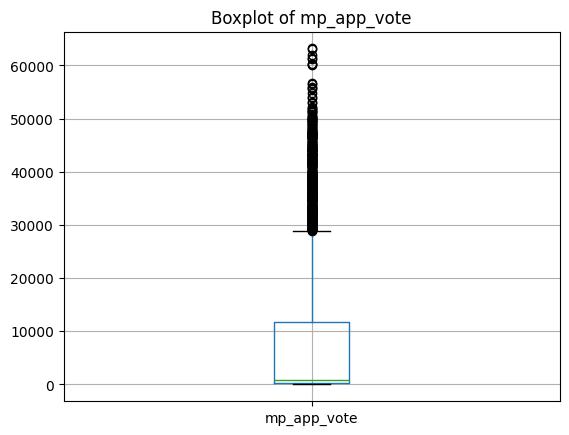

In [10]:
# Create a boxplot for the "mp_app_vote" column
df.boxplot(column=["mp_app_vote"])

# Set a title for the boxplot
plt.title("Boxplot of mp_app_vote")

# Show the plot
plt.show()

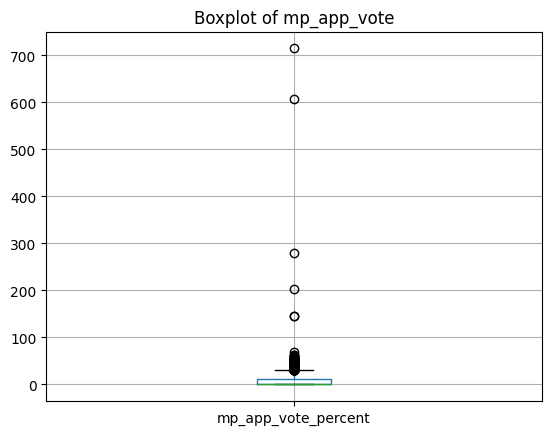

In [11]:
# Create a boxplot for the "mp_app_vote" column
df.boxplot(column=["mp_app_vote_percent"])

# Set a title for the boxplot
plt.title("Boxplot of mp_app_vote")

# Show the plot
plt.show()

**6. Outlier treatment**

**Checking outlier in voting score**

In [12]:
sub_town_sum = df.groupby('cons_id')['mp_app_vote'].sum().reset_index()
sub_town_sum

,cons_id,mp_app_vote
0,ACR_1,100946
1,ACR_2,106888
2,ATG_1,84454
3,ATG_2,83268
4,AYA_1,102821
...,...,...
395,YLA_2,93349
396,YLA_3,90913
397,YST_1,106293
398,YST_2,94418


In [13]:
df_rcs.head(10)

,prov_id,cons_id,turn_out,percent_turn_out,counted_vote_stations,percent_count,pause_report
0,ACR,ACR_1,105574,72.60136,310,100.0,False
1,ACR,ACR_2,111813,71.70350,331,100.0,False
2,ATG,ATG_1,89756,80.19872,239,100.0,False
3,ATG,ATG_2,91466,81.13075,253,100.0,False
4,AYA,AYA_1,110317,79.55591,226,100.0,False
5,AYA,AYA_2,106945,83.65404,223,100.0,False
6,AYA,AYA_3,107898,82.51101,197,100.0,False
7,AYA,AYA_4,113956,84.83351,201,100.0,False
8,AYA,AYA_5,107230,80.72968,213,100.0,False
9,BKK,BKK_1,94407,68.63767,239,100.0,False


**Compare the values between turn_out and mp_app_vote**

We found 2 data that have mp_app_vote more than turn_out. Therefore we can summary that these 2 data are false.

In [14]:
# Create a new column 'comparison_result'
sub_town_sum['comparison_result'] = (df_rcs['turn_out'] > sub_town_sum['mp_app_vote']).astype(int)
# Assuming your DataFrame is named df
result_zero_rows = sub_town_sum[sub_town_sum['comparison_result'] == 0]
result_zero_rows = pd.merge(result_zero_rows, df_rcs[['cons_id', 'turn_out']], on='cons_id')
# Display the resulting DataFrame
print(result_zero_rows)

  cons_id  mp_app_vote  comparison_result  turn_out
0   NST_6        84423                  0      3823
1   PRE_2        88027                  0     66028


In [15]:
deleted_df = df[~df['cons_id'].str.contains('NST_6|PRE_2')]
deleted_df

,cons_id,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
0,ACR_1,9,459,0.43477,706
1,ACR_1,1,38275,36.25419,709
2,ACR_1,13,126,0.11935,712
3,ACR_1,12,127,0.12029,742
4,ACR_1,11,212,0.20081,761
...,...,...,...,...,...
4776,YST_3,1,37946,36.30085,709
4777,YST_3,7,821,0.78541,763
4778,YST_3,9,531,0.50798,712
4779,YST_3,11,296,0.28317,769


array([[<Axes: title={'center': 'mp_app_vote_percent'}>]], dtype=object)

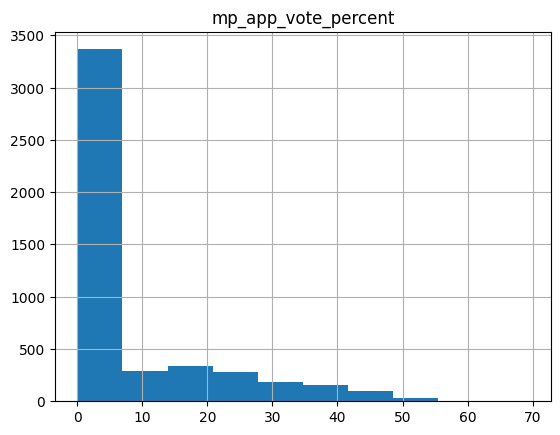

In [16]:
deleted_df.hist(['mp_app_vote_percent'])

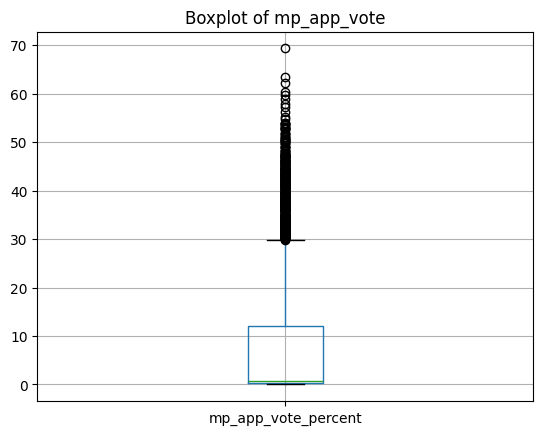

In [17]:
# Create a boxplot for the "mp_app_vote" column
deleted_df.boxplot(column=["mp_app_vote_percent"])

# Set a title for the boxplot
plt.title("Boxplot of mp_app_vote")

# Show the plot
plt.show()

**7. Missing values treatment**

In [18]:
# Finding how many missing values are there for each column
deleted_df.isnull().sum()

cons_id                0
mp_app_rank            0
mp_app_vote            0
mp_app_vote_percent    0
party_id               0
dtype: int64

No missing values in this data!!

**8. Feature selection and catagorize**

In [19]:
north_provinces = ['CMI','LPN','LPG','UTT','PRE','NAN','PYO','CRI','MSN']

North_df = deleted_df[deleted_df['cons_id'].str.contains('|'.join(north_provinces))].reset_index(drop=True)
North_df = North_df[(North_df['mp_app_rank'] >= 1) & (North_df['mp_app_rank'] <= 10)]
North_df = North_df.drop(columns=(['cons_id']), axis=1).reset_index(drop=True)
# North_df['part_name'] = 'North'
North_df

,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
0,2,30086,27.74284,705
1,7,675,0.62243,719
2,1,48823,45.02056,726
3,8,483,0.44538,739
4,6,1019,0.93964,743
...,...,...,...,...
345,4,1543,1.66840,701
346,2,18506,20.00995,726
347,8,654,0.70715,719
348,1,48779,52.74318,705


In [20]:
western_provinces = ['TAK','RBR','KRI','PBI','PKN']

Western_df = deleted_df[deleted_df['cons_id'].str.contains('|'.join(western_provinces))].reset_index(drop=True)
Western_df = Western_df[(Western_df['mp_app_rank'] >= 1) & (Western_df['mp_app_rank'] <= 10)]
Western_df = Western_df.drop(columns=(['cons_id']), axis=1).reset_index(drop=True)
# Western_df['part_name'] = 'Western'
Western_df

,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
0,1,33183,31.38703,705
1,10,287,0.27147,738
2,6,726,0.68671,701
3,7,498,0.47105,762
4,8,481,0.45497,719
...,...,...,...,...
182,1,31550,31.93384,743
183,6,1824,1.84619,763
184,2,17380,17.59145,726
185,9,459,0.46458,762


In [21]:
# List of values you want to filter on
east_provinces = ['CBI','RYG','CTI','TRT','CCO','PRI','NYK','SKW']

East_df = deleted_df[deleted_df['cons_id'].str.contains('|'.join(east_provinces))].reset_index(drop=True)
East_df = East_df[(East_df['mp_app_rank'] >= 1) & (East_df['mp_app_rank'] <= 10)]
East_df = East_df.drop(columns=(['cons_id']), axis=1).reset_index(drop=True)
# East_df['part_name'] = 'East'
East_df

,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
0,7,445,0.42386,709
1,10,85,0.08096,765
2,8,434,0.41338,762
3,9,403,0.38386,769
4,1,36463,34.73097,726
...,...,...,...,...
290,2,24090,18.57650,705
291,4,11356,8.75694,763
292,8,449,0.34624,762
293,6,7388,5.69710,701


In [22]:
# List of Esan provinces
esan_provinces = ['NMA', 'BRM', 'SRN', 'SSK', 'UBN', 'YST', 'CPM', 'ACR', 'BKN', 'NBP', 'KKN', 'UDN', 'LEI', 'NKI', 'MKM', 'RET', 'KSN', 'SNK', 'NPM', 'MDH']

Esan_df = deleted_df[deleted_df['cons_id'].str.contains('|'.join(esan_provinces))].reset_index(drop=True)
Esan_df = Esan_df[(Esan_df['mp_app_rank'] >= 1) & (Esan_df['mp_app_rank'] <= 10)]
Esan_df = Esan_df.drop(columns=(['cons_id']), axis=1).reset_index(drop=True)
# Esan_df['part_name'] = 'Esan'
Esan_df

,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
0,9,459,0.43477,706
1,1,38275,36.25419,709
2,10,234,0.22165,769
3,6,2701,2.55840,763
4,8,668,0.63273,719
...,...,...,...,...
1321,5,4957,4.74209,743
1322,1,37946,36.30085,709
1323,7,821,0.78541,763
1324,9,531,0.50798,712


In [23]:
central_provinces = ['BKK','SPK','NBI','PTE','AYA','ATG','LRI','SBR','CNT','SRI','NSN','UTI','KPT','STI','PLK','PCT','PNB','SPB','NPT','SKN','SKM']

Central_df = deleted_df[deleted_df['cons_id'].str.contains('|'.join(central_provinces))].reset_index(drop=True)
Central_df = Central_df[(Central_df['mp_app_rank'] >= 1) & (Central_df['mp_app_rank'] <= 10)]
Central_df = Central_df.drop(columns=(['cons_id']), axis=1).reset_index(drop=True)
# Central_df['part_name'] = 'Central'
Central_df

,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
0,3,15591,17.37043,726
1,8,254,0.28299,719
2,4,1599,1.78150,763
3,6,481,0.53590,701
4,5,617,0.68742,743
...,...,...,...,...
1164,1,43505,46.39494,709
1165,5,1528,1.62950,701
1166,3,18435,19.65960,726
1167,4,3304,3.52348,763


In [24]:
# List of values you want to filter on
southern_provinces = ['NST', 'KBI', 'PNA', 'PKT', 'SNI', 'RNG', 'CPN', 'SKA', 'STN', 'TRG', 'PLG', 'PTN', 'YLA', 'NWT']

Southern_df = deleted_df[deleted_df['cons_id'].str.contains('|'.join(southern_provinces))].reset_index(drop=True)
Southern_df = Southern_df[(Southern_df['mp_app_rank'] >= 1) & (Southern_df['mp_app_rank'] <= 10)]
Southern_df = Southern_df.drop(columns=(['cons_id']), axis=1).reset_index(drop=True)
# Southern_df['part_name'] = 'Southern'
Southern_df

,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
0,9,396,0.36578,719
1,1,36222,33.45803,763
2,2,32084,29.63579,701
3,8,398,0.36763,709
4,5,1963,1.81321,705
...,...,...,...,...
576,4,6270,6.40083,763
577,9,465,0.47470,719
578,2,24885,25.40426,743
579,8,616,0.62885,709


In [25]:
explored_df = pd.concat([North_df, Western_df, East_df, Esan_df, Central_df, Southern_df])
explored_df

,mp_app_rank,mp_app_vote,mp_app_vote_percent,party_id
0,2,30086,27.74284,705
1,7,675,0.62243,719
2,1,48823,45.02056,726
3,8,483,0.44538,739
4,6,1019,0.93964,743
...,...,...,...,...
576,4,6270,6.40083,763
577,9,465,0.47470,719
578,2,24885,25.40426,743
579,8,616,0.62885,709


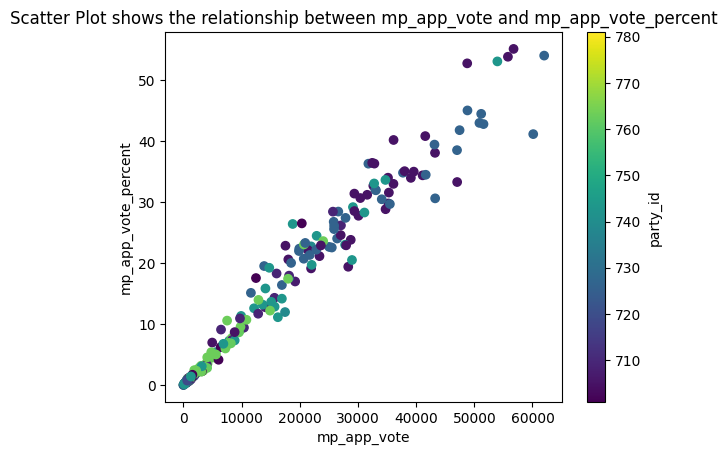

In [26]:
# Sample data
x = North_df.mp_app_vote
y = North_df.mp_app_vote_percent
category = North_df.party_id  # Replace 'some_category' with the actual column that represents categories

# Create a scatter plot with different colors
plt.scatter(x, y, c=category, cmap='viridis')  # 'cmap' specifies the colormap for coloring data points

# Add labels and title
plt.xlabel('mp_app_vote')
plt.ylabel('mp_app_vote_percent')
plt.title('Scatter Plot shows the relationship between mp_app_vote and mp_app_vote_percent')

# Add a colorbar to show the legend for the colors
cbar = plt.colorbar()
cbar.set_label('party_id')

# Show the plot
plt.show()


-------------------------------------------------

ข้างล่างเป็น Model ไม่ต้องไปยุ่ง

**9. Selecting final predictors for Machine Learning summary**

**Define Selected feature to training and testing data**

In [27]:
SelectedColumns = ['mp_app_vote','mp_app_vote_percent','party_id']

DataForTraining_Esan = Esan_df[SelectedColumns]
DataForTesting_East = East_df[SelectedColumns]
DataForTesting_North = North_df[SelectedColumns]
DataForTesting_South = Southern_df[SelectedColumns]
DataForTesting_West = Western_df[SelectedColumns]
DataForTesting_Central = Central_df[SelectedColumns]
DataForTraining_Esan.head()

,mp_app_vote,mp_app_vote_percent,party_id
0,459,0.43477,706
1,38275,36.25419,709
2,234,0.22165,769
3,2701,2.55840,763
4,668,0.63273,719


**Define Selected target to training and testing data**

In [28]:
TargetColumns = ['mp_app_rank']
label_encoder = LabelEncoder()
DataForTraining_Esan.loc[:, TargetColumns] = label_encoder.fit_transform(Esan_df[TargetColumns].values.ravel())
DataForTesting_East.loc[:, TargetColumns] = label_encoder.transform(East_df[TargetColumns].values.ravel())
DataForTesting_North.loc[:, TargetColumns] = label_encoder.transform(North_df[TargetColumns].values.ravel())
DataForTesting_South.loc[:, TargetColumns] = label_encoder.transform(Southern_df[TargetColumns].values.ravel())
DataForTesting_West.loc[:, TargetColumns] = label_encoder.transform(Western_df[TargetColumns].values.ravel())
DataForTesting_Central.loc[:, TargetColumns] = label_encoder.transform(Central_df[TargetColumns].values.ravel())
# # Assuming 'TargetColumns' is a list of column names
# DataForTraining_Esan.loc[:, TargetColumns] = Esan_df[TargetColumns]
# DataForTesting_East.loc[:, TargetColumns] = East_df[TargetColumns]
# DataForTesting_North.loc[:, TargetColumns] = North_df[TargetColumns]
# DataForTesting_South.loc[:, TargetColumns] = Southern_df[TargetColumns]
# DataForTesting_West.loc[:, TargetColumns] = Western_df[TargetColumns]

DataForTraining_Esan.head()

,mp_app_vote,mp_app_vote_percent,party_id,mp_app_rank
0,459,0.43477,706,8
1,38275,36.25419,709,0
2,234,0.22165,769,9
3,2701,2.55840,763,5
4,668,0.63273,719,7


**10. Data Pre-processing**

**Data Transformation**

In [29]:
Target = 'mp_app_rank'
Predictors = ['mp_app_vote','party_id']
x_train = DataForTraining_Esan[Predictors].values
y_train = DataForTraining_Esan[Target].values
x_test_North = DataForTesting_North[Predictors].values
y_test_North = DataForTesting_North[Target].values
x_test_East = DataForTesting_East[Predictors].values
y_test_East = DataForTesting_East[Target].values
x_test_Central = DataForTesting_Central[Predictors].values
y_test_Central = DataForTesting_Central[Target].values
x_test_West = DataForTesting_West[Predictors].values
y_test_West = DataForTesting_West[Target].values
x_test_South = DataForTesting_South[Predictors].values
y_test_South = DataForTesting_South[Target].values

In [30]:
# Sanity check for the sampled data
print(x_train.shape)
print(y_train.shape)
print(x_test_North.shape)
print(y_test_North.shape)
print(x_test_East.shape)
print(y_test_East.shape)
print(x_test_Central.shape)
print(y_test_Central.shape)
print(x_test_West.shape)
print(y_test_West.shape)
print(x_test_South.shape)
print(y_test_South.shape)

(1326, 2)
(1326,)
(350, 2)
(350,)
(295, 2)
(295,)
(1169, 2)
(1169,)
(187, 2)
(187,)
(581, 2)
(581,)


**11.Model construction**

In [31]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg',random_state=42)

# Printing all the parameters of Linear regression
print(clf)
print("*"*100)
print()

# Creating the model on Training Data
LOG=clf.fit(x_train,y_train)

# Printing some sample values of prediction
print("Training result prediction")
TrainingPrediction=LOG.predict(x_train)
TrainingDataResults=pd.DataFrame(data=x_train, columns=Predictors)
TrainingDataResults[Target]=y_train
TrainingDataResults[('Predicted '+Target)]=np.round(TrainingPrediction)

# Printing sample prediction values
print(TrainingDataResults.head())
print("*"*100)
print()

# Printing some sample values of prediction
print("Testing result prediction")
TestingPrediction=LOG.predict(x_test_Central)
TestingDataResults=pd.DataFrame(data=x_test_Central, columns=Predictors)
TestingDataResults[Target]=y_test_Central
TestingDataResults[('Predicted '+Target)]=np.round(TestingPrediction)

# Printing sample prediction values
print(TestingDataResults.head())
print("*"*100)
print()

from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
# Measuring Goodness of fit
print("The results of training data")
print(metrics.classification_report(y_train, TrainingPrediction))
print(metrics.confusion_matrix(y_train, TrainingPrediction))
print("*"*100)
print()
print("The results of testing data")
print(metrics.classification_report(y_test_Central, TestingPrediction))
print(metrics.confusion_matrix(y_test_Central, TestingPrediction))

LogisticRegression(C=1, random_state=42, solver='newton-cg')
****************************************************************************************************



Training result prediction
   mp_app_vote  party_id  mp_app_rank  Predicted mp_app_rank
0          459       706            8                      7
1        38275       709            0                      0
2          234       769            9                      9
3         2701       763            5                      3
4          668       719            7                      6
****************************************************************************************************

Testing result prediction
   mp_app_vote  party_id  mp_app_rank  Predicted mp_app_rank
0        15591       726            2                      2
1          254       719            7                      9
2         1599       763            3                      4
3          481       701            5                      7
4          617       743            4                      6
****************************************************************************************************

The results

c:\Users\natch\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


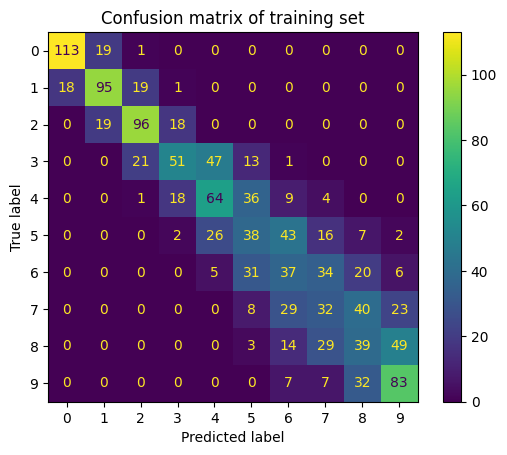

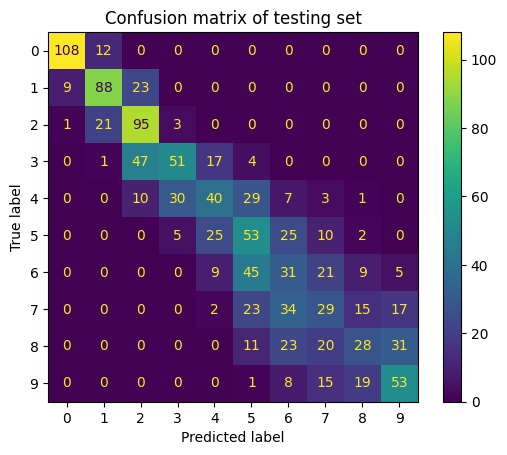

In [32]:
# Plot confusion matrix of training set
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_true=y_train, y_pred=TrainingPrediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=list(set(y_train)))
disp.plot()
plt.title('Confusion matrix of training set')
plt.show()

cm = confusion_matrix(y_true=y_test_Central, y_pred=TestingPrediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=list(set(y_test_Central)))
disp.plot()
plt.title('Confusion matrix of testing set')
plt.show()

**Decision Tree Classification**

DecisionTreeClassifier(criterion='entropy', max_depth=7)
****************************************************************************************************

Training result prediction
   mp_app_vote  party_id  mp_app_rank  Predicted mp_app_rank
0          459       706            8                      6
1        38275       709            0                      0
2          234       769            9                      9
3         2701       763            5                      3
4          668       719            7                      5
****************************************************************************************************

Testing result prediction
   mp_app_vote  party_id  mp_app_rank  Predicted mp_app_rank
0        15591       726            2                      2
1          254       719            7                      9
2         1599       763            3                      4
3          481       701            5                      8
4          617 

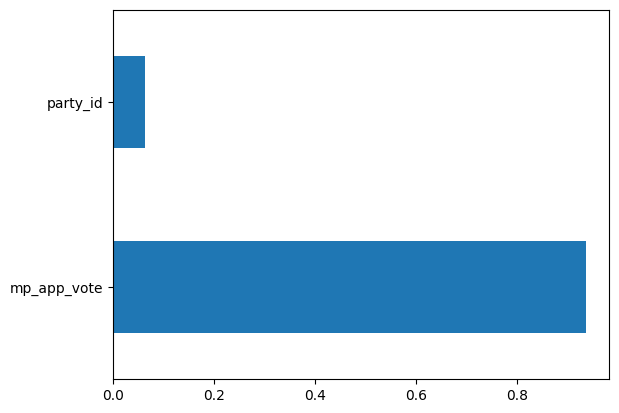

In [50]:
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=7,criterion='entropy')
# Or you can find best hyperparameters using GridSearchCV

# Printing all the parameters of Decision Tree
print(clf)
print("*"*100)
print()

# Creating the model on Training Data
DTree=clf.fit(x_train,y_train)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
print("Training result prediction")
TrainingPrediction=DTree.predict(x_train)
TrainingDataResults=pd.DataFrame(data=x_train, columns=Predictors)
TrainingDataResults[Target]=y_train
TrainingDataResults[('Predicted '+Target)]=np.round(TrainingPrediction)

# Printing sample prediction values
print(TrainingDataResults.head())
print("*"*100)
print()

# Printing some sample values of prediction
print("Testing result prediction")
TestingPrediction=DTree.predict(x_test_Central)
TestingDataResults=pd.DataFrame(data=x_test_Central, columns=Predictors)
TestingDataResults[Target]=y_test_Central
TestingDataResults[('Predicted '+Target)]=np.round(TestingPrediction)

# Printing sample prediction values
print(TestingDataResults.head())
print("*"*100)
print()


In [51]:
# Measuring Goodness of fit
print("The results of training data")
print(metrics.classification_report(y_train, TrainingPrediction))
print(metrics.confusion_matrix(y_train, TrainingPrediction))
print("*"*100)
print()
print("The results of testing data")
print(metrics.classification_report(y_test_Central, TestingPrediction))
print(metrics.confusion_matrix(y_test_Central, TestingPrediction))

The results of training data
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       133
           1       0.76      0.83      0.79       133
           2       0.81      0.75      0.78       133
           3       0.62      0.63      0.63       133
           4       0.50      0.66      0.57       132
           5       0.43      0.46      0.44       134
           6       0.64      0.35      0.45       133
           7       0.38      0.45      0.42       132
           8       0.45      0.34      0.38       134
           9       0.53      0.62      0.57       129

    accuracy                           0.60      1326
   macro avg       0.60      0.60      0.59      1326
weighted avg       0.60      0.60      0.59      1326

[[118  15   0   0   0   0   0   0   0   0]
 [ 12 110  10   1   0   0   0   0   0   0]
 [  1  19 100  13   0   0   0   0   0   0]
 [  0   0  13  84  33   1   1   0   1   0]
 [  0   0   0  28  87  14   0   3   0   

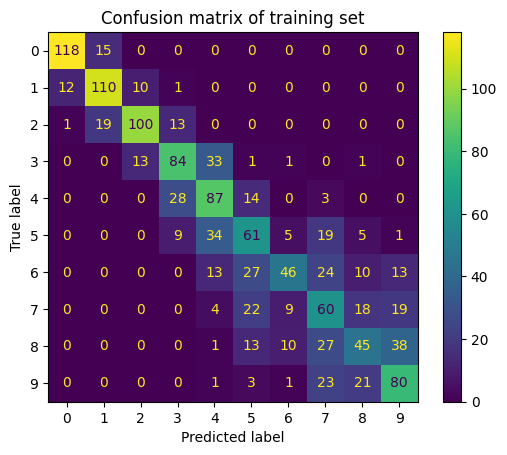

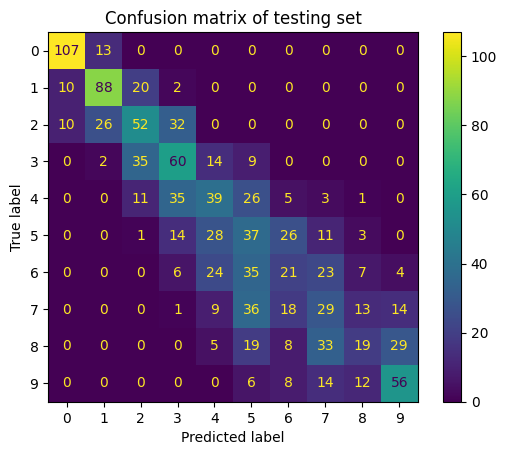

In [34]:
# Plot confusion matrix of training set
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_true=y_train, y_pred=TrainingPrediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=list(set(y_train)))
disp.plot()
plt.title('Confusion matrix of training set')
plt.show()

cm = confusion_matrix(y_true=y_test_Central, y_pred=TestingPrediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=list(set(y_test_Central)))
disp.plot()
plt.title('Confusion matrix of testing set')
plt.show()

In [54]:
# Printing some sample values of prediction
print("Testing result prediction")
TestingPrediction=DTree.predict(x_test_North)
TestingDataResults=pd.DataFrame(data=x_test_North, columns=Predictors)
TestingDataResults[Target]=y_test_North
TestingDataResults[('Predicted '+Target)]=np.round(TestingPrediction)

# Printing sample prediction values
print(TestingDataResults.head())
print("*"*100)
print()

# Measuring Goodness of fit
print("The results of testing data")
print(metrics.classification_report(y_test_North, TestingPrediction))
print(metrics.confusion_matrix(y_test_North, TestingPrediction))

The results of testing data
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        36
           1       0.56      0.61      0.59        36
           2       0.48      0.42      0.45        36
           3       0.32      0.44      0.37        36
           4       0.28      0.33      0.30        36
           5       0.10      0.17      0.13        36
           6       0.27      0.17      0.21        36
           7       0.30      0.28      0.29        36
           8       0.20      0.09      0.13        33
           9       0.56      0.31      0.40        29

    accuracy                           0.37       350
   macro avg       0.38      0.37      0.36       350
weighted avg       0.38      0.37      0.36       350

[[30  6  0  0  0  0  0  0  0  0]
 [11 22  3  0  0  0  0  0  0  0]
 [ 2 11 15  8  0  0  0  0  0  0]
 [ 0  0 11 16  6  3  0  0  0  0]
 [ 0  0  2 13 12  7  1  1  0  0]
 [ 0  0  0  8 12  6  7  2  1  0]
 [ 0  0  0  5  

In [57]:
# Printing some sample values of prediction
print("Testing result prediction")
TestingPrediction=DTree.predict(x_test_East)
TestingDataResults=pd.DataFrame(data=x_test_East, columns=Predictors)
TestingDataResults[Target]=y_test_East
TestingDataResults[('Predicted '+Target)]=np.round(TestingPrediction)

# Printing sample prediction values
print(TestingDataResults.head())
print("*"*100)
print()

# Measuring Goodness of fit
print("The results of testing data")
print(metrics.classification_report(y_test_East, TestingPrediction))
print(metrics.confusion_matrix(y_test_East, TestingPrediction))

Testing result prediction
   mp_app_vote  party_id  mp_app_rank  Predicted mp_app_rank
0          445       709            6                      6
1           85       765            9                      9
2          434       762            7                      6
3          403       769            8                      6
4        36463       726            0                      0
****************************************************************************************************

The results of testing data
              precision    recall  f1-score   support

           0       0.68      0.74      0.71        31
           1       0.50      0.65      0.56        31
           2       0.75      0.29      0.42        31
           3       0.46      0.58      0.51        31
           4       0.44      0.39      0.41        31
           5       0.36      0.32      0.34        31
           6       0.35      0.26      0.30        31
           7       0.30      0.32      0.31  

In [60]:
# Printing some sample values of prediction
print("Testing result prediction")
TestingPrediction=DTree.predict(x_test_West)
TestingDataResults=pd.DataFrame(data=x_test_West, columns=Predictors)
TestingDataResults[Target]=y_test_West
TestingDataResults[('Predicted '+Target)]=np.round(TestingPrediction)

# Printing sample prediction values
print(TestingDataResults.head())
print("*"*100)
print()

# Measuring Goodness of fit
print("The results of testing data")
print(metrics.classification_report(y_test_West, TestingPrediction))
print(metrics.confusion_matrix(y_test_West, TestingPrediction))

Testing result prediction
   mp_app_vote  party_id  mp_app_rank  Predicted mp_app_rank
0        33183       705            0                      0
1          287       738            9                      9
2          726       701            5                      4
3          498       762            6                      7
4          481       719            7                      7
****************************************************************************************************

The results of testing data
              precision    recall  f1-score   support

           0       0.75      0.63      0.69        19
           1       0.43      0.53      0.48        19
           2       0.42      0.42      0.42        19
           3       0.30      0.47      0.37        19
           4       0.25      0.21      0.23        19
           5       0.20      0.16      0.18        19
           6       0.22      0.11      0.14        19
           7       0.33      0.26      0.29  

In [63]:
# Printing some sample values of prediction
print("Testing result prediction")
TestingPrediction=DTree.predict(x_test_South)
TestingDataResults=pd.DataFrame(data=x_test_South, columns=Predictors)
TestingDataResults[Target]=y_test_South
TestingDataResults[('Predicted '+Target)]=np.round(TestingPrediction)

# Printing sample prediction values
print(TestingDataResults.head())
print("*"*100)
print()

# Measuring Goodness of fit
print("The results of testing data")
print(metrics.classification_report(y_test_South, TestingPrediction))
print(metrics.confusion_matrix(y_test_South, TestingPrediction))

Testing result prediction
   mp_app_vote  party_id  mp_app_rank  Predicted mp_app_rank
0          396       719            8                      8
1        36222       763            0                      0
2        32084       701            1                      0
3          398       709            7                      8
4         1963       705            4                      3
****************************************************************************************************

The results of testing data
              precision    recall  f1-score   support

           0       0.80      0.56      0.66        59
           1       0.60      0.61      0.61        59
           2       0.50      0.68      0.58        59
           3       0.29      0.59      0.39        59
           4       0.19      0.17      0.18        59
           5       0.14      0.17      0.15        59
           6       0.19      0.07      0.10        58
           7       0.31      0.25      0.28  

In [64]:
print('Accuracy of Esan trainning set:{:.2f}'.format(DTree.score(x_train, y_train)))
print('Accuracy of Central testing set:{:.2f}'.format(DTree.score(x_test_Central, y_test_Central)))
print('Accuracy of North testing set:{:.2f}'.format(DTree.score(x_test_North, y_test_North)))
print('Accuracy of East testing set:{:.2f}'.format(DTree.score(x_test_East, y_test_East)))
print('Accuracy of West testing set:{:.2f}'.format(DTree.score(x_test_West, y_test_West)))
print('Accuracy of South testing set:{:.2f}'.format(DTree.score(x_test_South, y_test_South)))

Accuracy of Esan trainning set:0.60
Accuracy of Central testing set:0.43
Accuracy of North testing set:0.37
Accuracy of East testing set:0.45
Accuracy of West testing set:0.36
Accuracy of South testing set:0.39


In [43]:
# example_df = pd.get_dummies(explored_df, columns=['cons_id','part_name'], prefix=['cons_id','part_name'])

# # Define your features (X) and target (y)
# X = example_df.drop('mp_app_rank', axis=1)
# y = example_df['mp_app_rank']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # Create a Decision Tree Regressor model
# dt_model = DecisionTreeRegressor()

# # Fit the model to the training data
# dt_model.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = dt_model.predict(X_train)

# print("Classification report \n=======================")
# print(classification_report(y_true=y_train, y_pred=y_pred))
# print("Confusion matrix \n=======================")
# print(confusion_matrix(y_true=y_train, y_pred=y_pred))

In [44]:
# # Compute confusion matrix
# def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):

#   plt.figure(figsize=(5,5))
#   plt.imshow(cm, interpolation='nearest', cmap=cmap)
#   plt.title(title)
#   plt.colorbar()
#   tick_marks = np.arange(len(classes))
#   plt.xticks(tick_marks, classes, rotation=45)
#   plt.yticks(tick_marks, classes)

#   fmt = 'd'
#   thresh = cm.max() / 2.
#   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#     plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
#   plt.tight_layout()


# class_names = list(set(y_train))
# cnf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred)
# # Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')
# plt.show()

In [45]:
# #Predict on training set
# y_pred = example_model.predict(X_test)

# # Classification report
# from sklearn.metrics import classification_report,confusion_matrix
# print("Classification report \n=======================")
# print(classification_report(y_true=y_test, y_pred=y_pred))
# print("Confusion matrix \n=======================")
# print(confusion_matrix(y_true=y_test, y_pred=y_pred))

In [46]:
# class_names = list(set(y_test))
# cnf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# # Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')
# plt.show()

In [ ]:
# example_model.fit(X_train, y_train)
# print('Accuracy of trainning set:{:.2f}'.format(example_model.score(X_train, y_train)))
# print('Accuracy of testing set:{:.2f}'.format(example_model.score(X_test, y_test)))

Accuracy of trainning set:1.00
Accuracy of testing set:0.34


### **8.2.2 Statistical Feature Selection**

**Guidelines**

Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True
* More information on ChiSq: https://www.mathsisfun.com/data/chi-square-test.html

In [ ]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)

        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])

    return(SelectedPredictors)

In [ ]:
CategoricalVariables=["cons_id","mp_app_vote","party_id","part_name"]

# Calling the function
FunctionChisq(inpData=explored_df,
              TargetVariable='mp_app_rank',
              CategoricalVariablesList= CategoricalVariables)

cons_id is NOT correlated with mp_app_rank | P-Value: 1.0
mp_app_vote is NOT correlated with mp_app_rank | P-Value: 1.0
party_id is correlated with mp_app_rank | P-Value: 0.0
part_name is NOT correlated with mp_app_rank | P-Value: 0.21227160738956044


['party_id']

In [ ]:
# result_df = df.copy()

# # Create a boolean column 'has_most_votes' to check if party_id has the most votes
# result_df['has_most_votes'] = df.groupby('cons_id')['mp_app_vote'].transform(max) == df['mp_app_vote']

# # Remove the 'mp_app_rank' column
# result_df.drop('mp_app_rank', axis=1, inplace=True)
# result_df.sort_values(by=['cons_id','party_id']).reset_index(drop=True)
# # Assuming you have a DataFrame named 'result_df_rcc'
# result_df

In [ ]:
# sns.pairplot(result_df,hue='has_most_votes')

In [ ]:
# # Perform one-hot encoding for 'cons_id'
# merge_df = pd.get_dummies(merged_df, columns=['cons_id'], prefix='cons_id')

# # Define your features (X) and target (y)
# X = merge_df.drop('has_most_votes', axis=1)
# y = merge_df['has_most_votes']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# # Create a DecisionTreeClassifier object
# dt_model = DecisionTreeClassifier(criterion='entropy',)

# # Fit the model to the training data
# dt_model.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = dt_model.predict(X_train)

# print("Classification report \n=======================")
# print(classification_report(y_true=y_train, y_pred=y_pred))
# print("Confusion matrix \n=======================")
# print(confusion_matrix(y_true=y_train, y_pred=y_pred))

In [ ]:
# Compute confusion matrix
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):

  plt.figure(figsize=(5,5))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()


class_names = list(set(y_train))
cnf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

ValueError: Found input variables with inconsistent numbers of samples: [3585, 1196]

In [ ]:
#Predict on training set
y_pred = dt_model.predict(X_test)

# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

       False       0.99      0.98      0.98       399
        True       0.77      0.83      0.80        29

    accuracy                           0.97       428
   macro avg       0.88      0.91      0.89       428
weighted avg       0.97      0.97      0.97       428

Confusion matrix 
[[392   7]
 [  5  24]]


<Figure size 640x480 with 0 Axes>

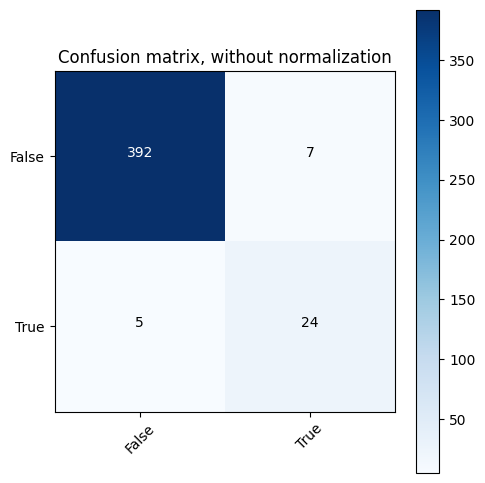

In [ ]:
class_names = list(set(y_test))
cnf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

In [ ]:
dt_model.fit(X_train, y_train)
print('Accuracy of trainning set:{:.2f}'.format(dt_model.score(X_train, y_train)))
print('Accuracy of testing set:{:.2f}'.format(dt_model.score(X_test, y_test)))

Accuracy of trainning set:1.00
Accuracy of testing set:0.97


## **2. Data Pre-processing**

## **3. Model Construction**

### **3.1 Decision Trees classification**

In [ ]:
from sklearn import tree
text_representation = tree.export_text(dt_model)
print(text_representation)

|--- feature_0 <= 27292.50
|   |--- feature_0 <= 18225.00
|   |   |--- class: False
|   |--- feature_0 >  18225.00
|   |   |--- feature_20 <= 0.50
|   |   |   |--- feature_1 <= 714.00
|   |   |   |   |--- feature_17 <= 0.50
|   |   |   |   |   |--- feature_58 <= 0.50
|   |   |   |   |   |   |--- feature_1 <= 708.00
|   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |--- feature_1 >  708.00
|   |   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_78 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |--- feature_78 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |--- feature_58 >  0.50
|   |   |   |   |   |   |--- class: True
|   |   |   |   |--- feature_17 >  0.50
|   |   |   |   |   |--- class: True
|   |   |   |--- feature_1 >  714.00
|   |   |   |   |--

## **4. Results Analysis**

In [ ]:
filtered_data = df[(df['mp_app_rank'] >= 1) & (df['mp_app_rank'] <= 3)].drop(columns=(['mp_app_vote','mp_app_vote_percent','cons_id']), axis=1).reset_index(drop=True)
filtered_data

,mp_app_rank,party_id
0,1,709
1,3,726
2,2,705
3,2,726
4,1,709
...,...,...
1195,1,705
1196,2,762
1197,2,705
1198,1,709


In [ ]:
# Perform one-hot encoding for 'cons_id'
test_df = pd.get_dummies(filtered_data, columns=['party_id'], prefix='party_id')

# Define your features (X) and target (y)
X = test_df.drop('mp_app_rank', axis=1)
y = test_df['mp_app_rank']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a DecisionTreeClassifier object
test_model = DecisionTreeClassifier(criterion='entropy',)

# Fit the model to the training data
test_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = test_model.predict(X_train)

print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_train, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

           1       0.42      0.56      0.48       302
           2       0.55      0.04      0.08       296
           3       0.42      0.67      0.52       302

    accuracy                           0.42       900
   macro avg       0.46      0.42      0.36       900
weighted avg       0.46      0.42      0.36       900

Confusion matrix 
[[168   3 131]
 [139  12 145]
 [ 93   7 202]]


<Figure size 640x480 with 0 Axes>

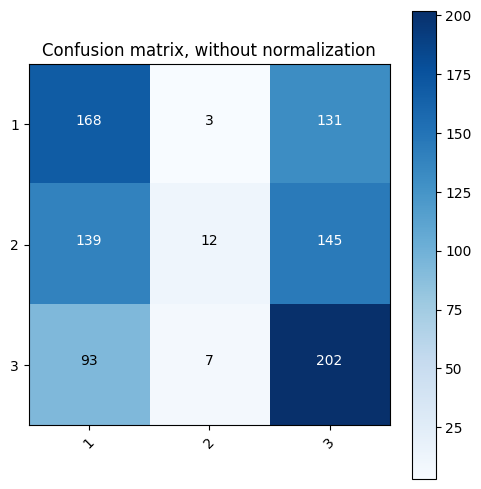

In [ ]:
# Compute confusion matrix
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):

  plt.figure(figsize=(5,5))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()


class_names = list(set(y_train))
cnf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

In [ ]:
#Predict on training set
y_pred = test_model.predict(X_test)

# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

           1       0.34      0.52      0.41        98
           2       0.50      0.04      0.07       104
           3       0.40      0.58      0.48        98

    accuracy                           0.37       300
   macro avg       0.41      0.38      0.32       300
weighted avg       0.42      0.37      0.31       300

Confusion matrix 
[[51  3 44]
 [60  4 40]
 [40  1 57]]


<Figure size 640x480 with 0 Axes>

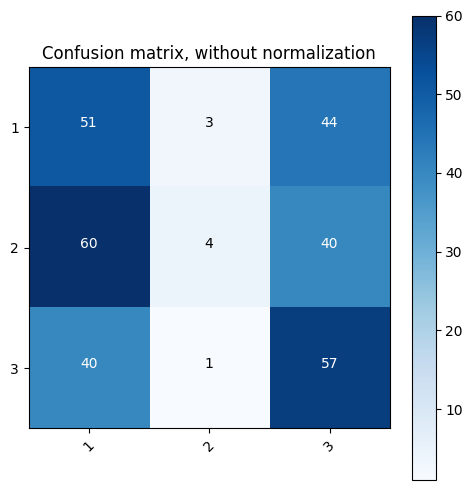

In [ ]:
class_names = list(set(y_test))
cnf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

In [ ]:
test_model.fit(X_train, y_train)
print('Accuracy of trainning set:{:.2f}'.format(test_model.score(X_train, y_train)))
print('Accuracy of testing set:{:.2f}'.format(test_model.score(X_test, y_test)))

Accuracy of trainning set:0.42
Accuracy of testing set:0.37
